In [1]:
from scipy.optimize import minimize 
import numpy as np
import operator as op
import math
import random as rd

In [2]:
def model(t, comp, params):
    Q = comp[0]
    S = comp[1]
    E = comp[2]
    I = comp[3]
    Ic = comp[4]
    R = comp[5]
    D = comp[6]
    
    a1 = params[0]
    a2 = params[1]
    a3 = params[2]
    b1 = params[3]
    b2 = params[4]
    b3 = params[5]
    c = params[6]
    d = params[7]
    e = params[8]
    f = params[9]
    
    lam = c*(I)
    
    q=a1*(a2**(-(t-a3)**2))
    s=b1*(b2**(-(t-b3)**2))

    return [
        q*S -s*Q,             # dQ/dt
        -q*S + s*Q - lam*S,   # dS/dt
        lam*S - d*E,          # dE/dt
        d*E - (e+f)*I,        # dI/dt
        d*E,                  #dIc/dt
        f*I,                  # dR/dt
        e*I,                  # dD/dt
    ]

In [76]:
tempos = [0, 30, 270]

In [88]:
pop = 11460000
sol = []
opt = [[], [], [], [], [], [], []]

for i in range(1, 2):
    print("Iteração", i)
    tspan = [tempos[i], tempos[i + 1]]
    real_data = np.genfromtxt('csvzão.csv', delimiter=';')[1:]
    data = []
    if i == 1:
        inits = [0, 1 - 5e-3 - 3.3e-4, 0, 5e-3, 5e-3 , 0, 3.3e-4]
        x0 = [.3, 1.01, 30, .3, 1.01,200,.09,.04,.007,.06]
    else:
        inits = T.solution[-1][1]
        x0 = params

    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data.append((k[0], k[1]/pop, k[3]/pop))

    def residual(params, data):
        a1 = params[0]
        a2 = params[1]
        a3 = params[2]
        b1 = params[3]
        b2 = params[4]
        b3 = params[5]
        c = params[6]
        d = params[7]
        e = params[8]
        f = params[9]

        T = ode_solver()
        T.function = model
        T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], params = [a1,a2,a3,b1,b2,b3,c,d,e,f])

        model_out_0 = [(k[0], k[1][0]) for k in T.solution] #Q
        model_out_1 = [(k[0], k[1][1]) for k in T.solution] #S
        model_out_2 = [(k[0], k[1][2]) for k in T.solution] #E
        model_out_3 = [(k[0], k[1][3]) for k in T.solution] #I
        model_out_4 = [(k[0], k[1][4]) for k in T.solution] #Ic
        model_out_5 = [(k[0], k[1][5]) for k in T.solution] #R
        model_out_6 = [(k[0], k[1][6]) for k in T.solution] #D
        
        erro_I = 0
        erro_D = 0
        for i in range(tspan[1] - tspan[0]):
            erro_I += (model_out_4[i][1] - data[i][1])**2
            erro_D += (model_out_6[i][1] - data[i][2])**2

        return erro_I + erro_D

   # cons = ({'type': 'ineq', 'fun': lambda x0: x0[0]},
    #        {'type': 'ineq', 'fun': lambda x0: x0[1]},
     #       {'type': 'ineq', 'fun': lambda x0: x0[2] - 1},
      #      {'type': 'ineq', 'fun': lambda x0: - x0[2] + 30},
       #     {'type': 'ineq', 'fun': lambda x0: x0[3]},
        #    {'type': 'ineq', 'fun': lambda x0: x0[4]},
         #   {'type': 'ineq', 'fun': lambda x0: x0[5]},
          #  {'type': 'ineq', 'fun': lambda x0: 1 - x0[3]},
           # {'type': 'ineq', 'fun': lambda x0: 1 - x0[4]},
            #{'type': 'ineq', 'fun': lambda x0: 1 - x0[5]}
            #)
    Bounds=[[0,1],[1,2],[20,50],[0,1],[1,2],[170,260],[0,1],[0,1],[0,1],[0,1]]
    #Bounds=((0,.5),(1,1.3),(25,35),(0,1),(1,1.3),(140,170),(0,.5,(0,.5),(0,.5),(0,.5))
    
    res = minimize(residual, x0, method = 'SLSQP', args = data, tol = 1e-10, bounds= Bounds)
    params = res.x

    T = ode_solver()
    T.function = model
    if i == 1:
        T.ode_solve([tspan[0], 365], inits, num_points = tspan[1] - tspan[0], params = res.x)
    else:
        T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], params = res.x)
    
    opt[0].append(res.x[0])
    opt[1].append(res.x[1])
    opt[2].append(res.x[2])
    opt[3].append(res.x[3])
    opt[4].append(res.x[4])
    opt[5].append(res.x[5])
    opt[6].append(res.x[6])
    
    
    for item in T.solution:
        sol.append(item)
        


model_out_0 = [(k[0], k[1][0]) for k in sol]
model_out_1 = [(k[0], k[1][1]) for k in sol]
model_out_2 = [(k[0], k[1][2]) for k in sol]
model_out_3 = [(k[0], k[1][3]) for k in sol]
model_out_4 = [(k[0], k[1][4]) for k in sol]
model_out_5 = [(k[0], k[1][5]) for k in sol]
model_out_6 = [(k[0], k[1][6]) for k in sol]

plot0 = list_plot(model_out_0, color = 'green', pointsize = 10, alpha = 1, legend_label = 'Q')
plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 10, alpha = 1, legend_label = 'S')
plot2 = list_plot(model_out_2, color = 'red', pointsize = 10, alpha = 1, legend_label = 'E')
plot3 = list_plot(model_out_3, color = 'blue', pointsize = 10, alpha = 1, legend_label = 'I')
plot4 = list_plot(model_out_4, color = 'purple', pointsize = 10, alpha = 1, legend_label = 'Ic')
plot5 = list_plot(model_out_5, color = 'black', pointsize = 20, alpha = 1, legend_label = 'R')
plot6 = list_plot(model_out_6, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'D')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()
plot6.legend()

real_data = np.genfromtxt('csvzão.csv', delimiter=';')[1:]
data = []
for k in real_data:
    if tempos[1] <= k[0] <= tempos[-1]:
        data.append((k[0], k[1]/pop, k[3]/pop))

data1 = [(item[0], item[1]) for item in data]
data2 = [(item[0], item[2]) for item in data]

plot7 = list_plot(data1, color = 'red', pointsize = 20, alpha = 1, legend_label = 'Ir')
plot8 = list_plot(data2, color = 'purple', pointsize = 20, alpha = 1, legend_label = 'Dr')

plot7.legend()
plot8.legend()

Iteração 1


/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:73: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


True

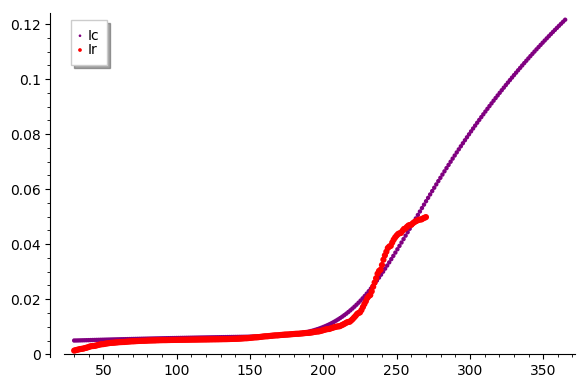

In [89]:
show(plot4 + plot7)

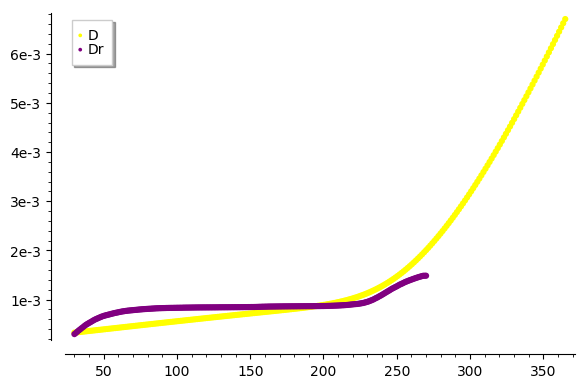

In [90]:
show(plot6+plot8)

In [91]:
res.x

array([1.00000000e+00, 1.00003566e+00, 3.01877285e+01, 3.69582515e-01,
       1.00121672e+00, 1.99999977e+02, 5.51196957e-01, 5.94881945e-03,
       6.66838568e-04, 2.39146927e-03])